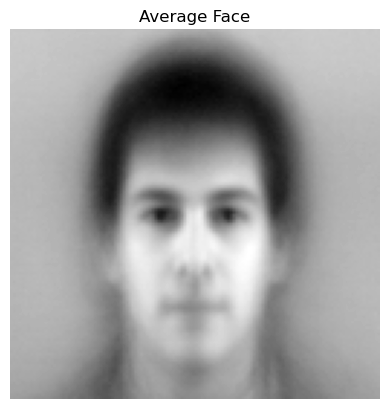

In [2]:
# a) Download the face database and load it into a Python notebook.
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load the faces.mat file
data_dict = loadmat('faces.mat')
faces = data_dict['faces']

# Reshape the 3D array into a 2D matrix X
X = np.reshape(faces, (128**2, 143))

# Compute the average face
aveface = np.mean(X, axis=1)

# Plot the average face
plt.imshow(np.reshape(aveface, (128, 128)), cmap='gray')
plt.axis('off')
plt.title('Average Face')
plt.show()

In [3]:
# b) Subtract the average face and check the mean of the resulting matrix.
# Subtract the average face from each column of X
# We can use np.outer for cleaner code
X0 = X - np.outer(aveface, np.ones(143))

# Check the mean of X0
mean_X0 = np.mean(X0, axis=1)

# Compute the absolute error between the mean of X0 and the zero vector
# using the 2-norm (np.linalg.norm)
zero_vector = np.zeros(128**2)
error = np.linalg.norm(mean_X0 - zero_vector, ord=2)

print(f'The 2-norm of the difference between the mean of X0 and the zero vector is: {error}')

The 2-norm of the difference between the mean of X0 and the zero vector is: 7.07249407175082e-13


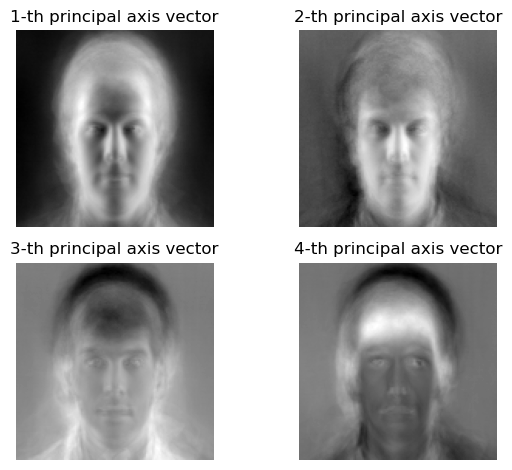

In [4]:
# c) Compute the PCA using the reduced SVD.
# Compute SVD of X0
U, Sigma, VH = np.linalg.svd(X0, full_matrices=False)

# Plot the first few principal axis vectors
fig, axes = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        k = i * 2 + j
        axes[i, j].imshow(np.reshape(U[:, k], (128, 128)), cmap='gray')
        axes[i, j].set_title(f'{k + 1}-th principal axis vector')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

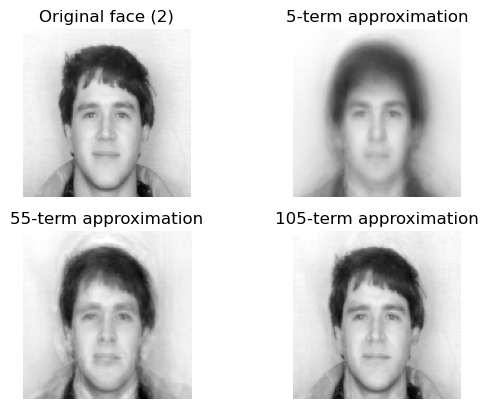

In [5]:
# d) Perform k-term approximation experiments for face No. 2
# Choose the face and the k values
f_num = 2
klist = [0, 5, 55, 105]

# Get the original face and normalize its pixel values for plotting
face_j = X[:, f_num - 1]
minval = face_j.min()
maxval = face_j.max()

# Initialize an empty list to store approximations
X_approx = []

fig, axes = plt.subplots(2, 2)

for i in range(2):
    for j in range(2):
        k = klist[i * 2 + j]
        
        # Calculate the k-term approximation
        if k == 0:
            face_j_approx = aveface
        else:
            # U is the set of principal components, U[:, :k] are the first k components.
            # U[:, :k].T is the transpose of this.
            # X0[:, f_num - 1] is the centered face vector.
            # The inner product U[:, :k].T @ X0[:, f_num - 1] gives the coefficients.
            # Multiplying by U[:, :k] reconstructs the k-term approximation of the centered face.
            face_j_approx_centered = U[:, :k] @ (U[:, :k].T @ X0[:, f_num - 1])
            
            # Add the average face back to get the final approximation
            face_j_approx = aveface + face_j_approx_centered

        X_approx.append(face_j_approx)

        # Plot the original face or the approximation
        if k == 0:
            axes[i, j].imshow(np.reshape(face_j, (128, 128)), cmap='gray', vmin=minval, vmax=maxval)
            axes[i, j].set_title(f'Original face ({f_num})')
            axes[i, j].axis('off')
        else:
            axes[i, j].imshow(np.reshape(face_j_approx, (128, 128)), cmap='gray', vmin=minval, vmax=maxval)
            axes[i, j].set_title(f'{k}-term approximation')
            axes[i, j].axis('off')

plt.show()

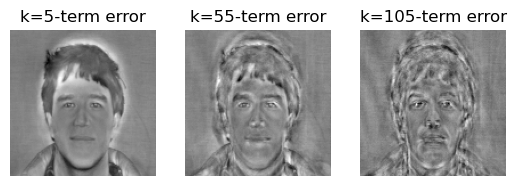

Frobenius norms of the approximation errors:
k = 5: 1254.0965176670427
k = 55: 558.7576023571476
k = 105: 233.4997817451612


In [8]:
# e) Compute and plot the approximation errors for face No. 2 and report Frobenius norms.
# Choose the face and the k values
f_num = 2
klist = [0, 5, 55, 105]

# Get the original face and its approximations
face_j = X[:, f_num - 1]

# Initialize a list to store Frobenius norms
frobenius_norms = []

# Calculate errors and Frobenius norms for k=5, 55, 105
fig, axes = plt.subplots(1, 3)

for i in range(3):
    k = klist[i + 1]
    
    # Get the approximation for the current k
    face_j_approx = X_approx[i + 1]

    # Calculate the error
    error_matrix = face_j - face_j_approx
    
    # Calculate the Frobenius norm of the error
    # Here error_matrix is 1D after flatten, so 'fro' is invalid, just use default 2-norm
    frobenius_norm = np.linalg.norm(error_matrix)
    frobenius_norms.append((k, frobenius_norm))

    # Plot the error
    err_minval = error_matrix.min()
    err_maxval = error_matrix.max()
    axes[i].imshow(np.reshape(error_matrix, (128, 128)), cmap='gray', vmin=err_minval, vmax=err_maxval)
    axes[i].set_title(f'k={k}-term error')
    axes[i].axis('off')

plt.show()

# Report the Frobenius norms
print("Frobenius norms of the approximation errors:")
for k, norm in frobenius_norms:
    print(f"k = {k}: {norm}")


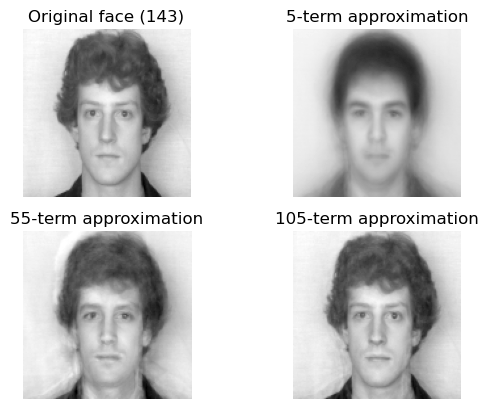

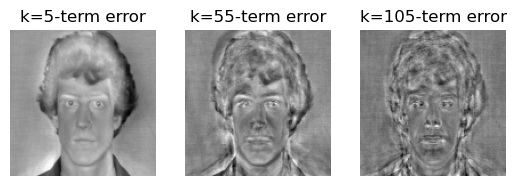

Frobenius norms of the approximation errors for face No. 143:
k = 5: 1480.443735710609
k = 55: 545.0000839546516
k = 105: 228.70584517554755


In [9]:
# f) Repeat parts (d) and (e) with face No. 143.
# Choose the face and the k values
f_num = 143
klist = [0, 5, 55, 105]

# Get the original face and normalize its pixel values for plotting
face_j = X[:, f_num - 1]
minval = face_j.min()
maxval = face_j.max()

# Initialize an empty list to store approximations for face 143
X_approx_143 = []

# --- Part (d) for face 143 ---
fig, axes = plt.subplots(2, 2)

for i in range(2):
    for j in range(2):
        k = klist[i * 2 + j]
        
        # Calculate the k-term approximation
        if k == 0:
            face_j_approx = aveface
        else:
            face_j_approx_centered = U[:, :k] @ (U[:, :k].T @ X0[:, f_num - 1])
            face_j_approx = aveface + face_j_approx_centered

        X_approx_143.append(face_j_approx)

        # Plot the original face or the approximation
        if k == 0:
            axes[i, j].imshow(np.reshape(face_j, (128, 128)), cmap='gray', vmin=minval, vmax=maxval)
            axes[i, j].set_title(f'Original face ({f_num})')
            axes[i, j].axis('off')
        else:
            axes[i, j].imshow(np.reshape(face_j_approx, (128, 128)), cmap='gray', vmin=minval, vmax=maxval)
            axes[i, j].set_title(f'{k}-term approximation')
            axes[i, j].axis('off')

plt.show()

# --- Part (e) for face 143 ---
# Initialize a list to store Frobenius norms
frobenius_norms_143 = []

# Calculate errors and Frobenius norms for k=5, 55, 105
fig, axes = plt.subplots(1, 3)

for i in range(3):
    k = klist[i + 1]
    
    # Get the approximation for the current k
    face_j_approx = X_approx_143[i + 1]

    # Calculate the error
    error_matrix = face_j - face_j_approx
    
    # Calculate the Frobenius norm of the error (L2 norm for a vector)
    frobenius_norm = np.linalg.norm(error_matrix)
    frobenius_norms_143.append((k, frobenius_norm))

    # Plot the error
    err_minval = error_matrix.min()
    err_maxval = error_matrix.max()
    axes[i].imshow(np.reshape(error_matrix, (128, 128)), cmap='gray', vmin=err_minval, vmax=err_maxval)
    axes[i].set_title(f'k={k}-term error')
    axes[i].axis('off')

plt.show()

# Report the Frobenius norms for face 143
print("Frobenius norms of the approximation errors for face No. 143:")
for k, norm in frobenius_norms_143:
    print(f"k = {k}: {norm}")

